# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [27]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

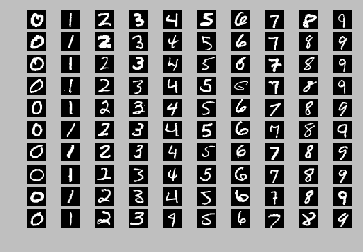

In [229]:
#def P1(num_examples=10):

### STUDENT START ###
col = 0
row = 0
i = 0

f,axarr = plt.subplots(10,10)

while(col<10):
    while(row<10):
        if(mini_train_labels[i] == str(col)):
            map_num = (np.reshape(mini_train_data[i], (28, 28)) * 255).astype(np.uint8)
            axarr[row,col].imshow(map_num)
            axarr[row,col].axis('off')
            row+=1
        i+=1
        
    row=0
    i=0
    col+=1

plt.style.use('grayscale')
plt.show()

### STUDENT END ###

#P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [230]:
#def P2(k_values):

### STUDENT START ###

model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data, mini_train_labels)
test_predicted_labels = model.predict(dev_data)

wrong_prediction = (test_predicted_labels != dev_labels)

print('k = 1 // number of incorrect predictions:', np.sum(wrong_prediction))
print(classification_report(y_pred=test_predicted_labels,y_true=dev_labels))

k = [3,5,7,9]
for i in k:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(mini_train_data, mini_train_labels)
    test_predicted_labels = model.predict(dev_data)

    wrong_prediction = (test_predicted_labels != dev_labels)
    print('k = ',i,' // number of incorrect predictions:',np.sum(wrong_prediction))

### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

k = 1 // number of incorrect predictions: 114
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       116
           1       0.82      0.99      0.90        95
           2       0.97      0.88      0.92       100
           3       0.81      0.88      0.84       104
           4       0.87      0.84      0.85        94
           5       0.89      0.83      0.86        89
           6       0.93      0.96      0.94        98
           7       0.91      0.93      0.92       106
           8       0.96      0.78      0.86        95
           9       0.79      0.80      0.79       103

   micro avg       0.89      0.89      0.89      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.89      0.89      1000

k =  3  // number of incorrect predictions: 132
k =  5  // number of incorrect predictions: 124
k =  7  // number of incorrect predictions: 138
k =  9  // number of incorrect predictions: 141


ANSWER: The '9' label was the most difficult label to predict for the 1-Nearest Neighbor model.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [203]:
#def P3(train_sizes, accuracies):

### STUDENT START ###

#############################
# Test on 5000 data points #
#############################
temp_train_data = train_data[:5000]
temp_train_labels = train_labels[:5000]

model = KNeighborsClassifier(n_neighbors=1)
model.fit(temp_train_data, temp_train_labels)

temp_start = time.time()
test_predicted_labels = model.predict(dev_data)
temp_mid = time.time()
wrong_prediction = (test_predicted_labels != dev_labels)

print('train_size = 5,000 // number of incorrect predictions:', np.sum(wrong_prediction))
print(classification_report(y_pred=test_predicted_labels,y_true=dev_labels))
temp_end = time.time()
print("Prediction took: ",temp_mid-temp_start,"\nEvaluation operation took: ",temp_end-temp_mid," seconds.\n\n")

#############################
# Test on 10000 data points #
#############################
temp_train_data = train_data[:10000]
temp_train_labels = train_labels[:10000]

model = KNeighborsClassifier(n_neighbors=1)
model.fit(temp_train_data, temp_train_labels)

temp_start = time.time()
test_predicted_labels = model.predict(dev_data)
temp_mid = time.time()
wrong_prediction = (test_predicted_labels != dev_labels)

print('train_size = 10,000 // number of incorrect predictions:', np.sum(wrong_prediction))
print(classification_report(y_pred=test_predicted_labels,y_true=dev_labels))
temp_end = time.time()
print("Prediction took: ",temp_mid-temp_start,"\nEvaluation operation took: ",temp_end-temp_mid," seconds.\n\n")

#############################
# Test on 25000 data points #
#############################
temp_train_data = train_data[:25000]
temp_train_labels = train_labels[:25000]

model = KNeighborsClassifier(n_neighbors=1)
model.fit(temp_train_data, temp_train_labels)

temp_start = time.time()
test_predicted_labels = model.predict(dev_data)
temp_mid = time.time()
wrong_prediction = (test_predicted_labels != dev_labels)


print('train_size = 25,000 // number of incorrect predictions:', np.sum(wrong_prediction))
print(classification_report(y_pred=test_predicted_labels,y_true=dev_labels))
temp_end = time.time()
print("Prediction took: ",temp_mid-temp_start,"\nEvaluation operation took: ",temp_end-temp_mid," seconds.\n\n")

#############################
# Test on 60000 data points #
#############################
temp_train_data = train_data
temp_train_labels = train_labels

model = KNeighborsClassifier(n_neighbors=1)
model.fit(temp_train_data, temp_train_labels)

temp_start = time.time()
test_predicted_labels = model.predict(dev_data)
temp_mid = time.time()
wrong_prediction = (test_predicted_labels != dev_labels)

print('train_size = 60,000 // number of incorrect predictions:', np.sum(wrong_prediction))
print(classification_report(y_pred=test_predicted_labels,y_true=dev_labels))
temp_end = time.time()
print("Prediction took: ",temp_mid-temp_start,"\nEvaluation operation took: ",temp_end-temp_mid," seconds.\n\n")

### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
#accuracies = []
#P3(train_sizes, accuracies)

train_size = 5,000 // number of incorrect predictions: 55
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       116
           1       0.94      0.99      0.96        95
           2       0.99      1.00      1.00       100
           3       0.93      0.93      0.93       104
           4       0.94      0.89      0.92        94
           5       0.88      0.91      0.90        89
           6       0.95      0.99      0.97        98
           7       0.94      0.98      0.96       106
           8       0.98      0.85      0.91        95
           9       0.91      0.90      0.91       103

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.95      0.94      0.94      1000

Prediction took:  6.5602641105651855 
Evaluation operation took:  0.02190685272216797  seconds.


train_size = 10,000 // number of incorrect predictions: 37
              precision   

### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

In [228]:
#def P4():

### STUDENT START ###

train_sizes = [[1000],[5000],[10000],[25000],[60000]]
train_accuracy = [114,55,37,25,20]
test_sizes = [[60000],[120000],[1000000]]

print("\n\nModel #1:\n")
model = LinearRegression()
model.fit(train_sizes, train_accuracy)
print("Predictions for 60,000; 120,000; and 1,000,000: ",model.predict(test_sizes))
print("R2 score: ",model.score(train_sizes, train_accuracy))

train_accuracy2 = [np.log(114),np.log(55),np.log(37),np.log(25),np.log(20)]
print("\n\nModel #2:\n")
model2 = LinearRegression()
model2.fit(train_sizes, train_accuracy2)

model2_pred = model2.predict(test_sizes)
model2_pred_exp = np.zeros(len(model2_pred))
for i in range(len(model2_pred)):
    model2_pred_exp[i] = np.exp(model2_pred[i])
    
print("Predictions for 60,000; 120,000; and 1,000,000: ",model2_pred_exp)
print("R2 score: ",model2.score(train_sizes, train_accuracy2))

### STUDENT END ###

#P4()



Model #1:

Predictions for 60,000; 120,000; and 1,000,000:  [    7.37900294   -57.17526398 -1003.97117881]
R2 score:  0.460018167486024


Model #2:

Predictions for 60,000; 120,000; and 1,000,000:  [1.61802953e+01 3.98189535e+00 4.67311391e-09]
R2 score:  0.6631734558871405


ANSWER:  The problem with using regression here is that a straight line regression without a transformation goes negative, which does not make sense in this case.  By applying a log transformation pre-model and then inverting the log post-transformation we keep the model positive and approaching 0.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

In [231]:
#def P5():

### STUDENT START ###

model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data, mini_train_labels)
test_predicted_labels = model.predict(dev_data)

wrong_prediction = (test_predicted_labels != dev_labels)

print('k = 1 // number of incorrect predictions:', np.sum(wrong_prediction))
print(confusion_matrix(y_pred=test_predicted_labels,y_true=dev_labels))

### STUDENT END ###

#P5()

k = 1 // number of incorrect predictions: 114
[[111   0   0   0   0   1   3   0   0   1]
 [  0  94   0   0   0   0   0   0   0   1]
 [  0   5  88   4   1   0   0   2   0   0]
 [  0   5   1  91   0   3   0   1   1   2]
 [  0   3   0   0  79   0   0   2   0  10]
 [  3   0   0   5   0  74   3   0   1   3]
 [  1   1   1   0   0   0  94   0   0   1]
 [  0   4   1   1   0   0   0  99   0   1]
 [  1   2   0   9   0   5   1   0  74   3]
 [  1   1   0   2  11   0   0   5   1  82]]


ANSWER: 9 and 4 are the most confused numbers with a total of 21 instances of confusion.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [232]:
#def P6():
    
### STUDENT START ###
f_mini_train_data = np.zeros(mini_train_data.shape)
f_dev_data = np.zeros(dev_data.shape)
temp_list = np.zeros(mini_train_data[0].shape)
sum_n = float()

for i in range(len(mini_train_data)):
    temp_matrix = np.reshape(mini_train_data[i], (28, 28))
    list_n = 0
    for j in range(28):
        for k in range(28):
            n = 1
            sum_n = temp_matrix[j][k]
            if(j-1>=0):
                sum_n += temp_matrix[j-1][k]
                n += 1
                if(k-1>=0):
                    sum_n += temp_matrix[j-1][k-1]
                    n += 1
                if(k+1<=27):
                    sum_n += temp_matrix[j-1][k+1]
                    n += 1
            if(j+1<=27):
                sum_n += temp_matrix[j+1][k]
                n += 1
                if(k-1>=0):
                    sum_n += temp_matrix[j+1][k-1]
                    n += 1
                if(k+1<=27):
                    sum_n += temp_matrix[j+1][k+1]
                    n += 1
            if(k-1>=0):
                sum_n += temp_matrix[j][k-1]
                n += 1
            if(k+1<=27):
                sum_n += temp_matrix[j][k+1]
                n += 1
            temp_list[list_n] = float(sum_n/n)
            list_n+=1
    f_mini_train_data[i] = np.array(temp_list,copy=True)


temp_list = np.zeros(dev_data[0].shape)

for i in range(len(dev_data)):
    temp_matrix = np.reshape(dev_data[i], (28, 28))
    list_n = 0
    for j in range(28):
        for k in range(28):
            n = 1
            sum_n = temp_matrix[j][k]
            if(j-1>=0):
                sum_n += temp_matrix[j-1][k]
                n += 1
                if(k-1>=0):
                    sum_n += temp_matrix[j-1][k-1]
                    n += 1
                if(k+1<=27):
                    sum_n += temp_matrix[j-1][k+1]
                    n += 1
            if(j+1<=27):
                sum_n += temp_matrix[j+1][k]
                n += 1
                if(k-1>=0):
                    sum_n += temp_matrix[j+1][k-1]
                    n += 1
                if(k+1<=27):
                    sum_n += temp_matrix[j+1][k+1]
                    n += 1
            if(k-1>=0):
                sum_n += temp_matrix[j][k-1]
                n += 1
            if(k+1<=27):
                sum_n += temp_matrix[j][k+1]
                n += 1
            temp_list[list_n] = float(sum_n/n)
            list_n+=1
    f_dev_data[i] = np.array(temp_list,copy=True)


## No Filters
model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data, mini_train_labels)
test_predicted_labels = model.predict(dev_data)

print('No filters // number of incorrect predictions:', np.sum(wrong_prediction))
print(classification_report(y_pred=test_predicted_labels,y_true=dev_labels), "\n\n")


## Mini_train_data filtered
model = KNeighborsClassifier(n_neighbors=1)
model.fit(f_mini_train_data, mini_train_labels)
test_predicted_labels = model.predict(dev_data)

wrong_prediction = (test_predicted_labels != dev_labels)

print('Mini_train_data filtered // number of incorrect predictions:', np.sum(wrong_prediction))
print(classification_report(y_pred=test_predicted_labels,y_true=dev_labels), "\n\n")

## Dev_data filtered
model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data, mini_train_labels)
test_predicted_labels = model.predict(f_dev_data)

wrong_prediction = (test_predicted_labels != dev_labels)

print('Dev_data filtered // number of incorrect predictions:', np.sum(wrong_prediction))
print(classification_report(y_pred=test_predicted_labels,y_true=dev_labels), "\n\n")

## Both filtered
model = KNeighborsClassifier(n_neighbors=1)
model.fit(f_mini_train_data, mini_train_labels)
test_predicted_labels = model.predict(f_dev_data)

wrong_prediction = (test_predicted_labels != dev_labels)

print('Both // number of incorrect predictions:', np.sum(wrong_prediction))
print(classification_report(y_pred=test_predicted_labels,y_true=dev_labels), "\n\n")

### STUDENT END ###

#P6()

No filters // number of incorrect predictions: 114
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       116
           1       0.82      0.99      0.90        95
           2       0.97      0.88      0.92       100
           3       0.81      0.88      0.84       104
           4       0.87      0.84      0.85        94
           5       0.89      0.83      0.86        89
           6       0.93      0.96      0.94        98
           7       0.91      0.93      0.92       106
           8       0.96      0.78      0.86        95
           9       0.79      0.80      0.79       103

   micro avg       0.89      0.89      0.89      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.89      0.89      1000
 


Mini_train_data filtered // number of incorrect predictions: 88
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       116
           1  

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [234]:
#def P7():

### STUDENT START ###

alpha = .001
clf = BernoulliNB(alpha=alpha, binarize=0.1)
clf.fit(mini_train_data, mini_train_labels)
print('Accuracy: %3.2f' %clf.score(dev_data, dev_labels))

print('\nFeature probabilities\n', np.exp(clf.feature_log_prob_).T)
print('\nPrior probabilities\n', np.exp(clf.class_log_prior_))


pp_mini_train_data = np.zeros(mini_train_data.shape)
for i in range(len(mini_train_data)):
    for j in range(len(mini_train_data[i])):
        if mini_train_data[i][j]<0.1:
            pp_mini_train_data[i][j] = 0
        if mini_train_data[i][j]>=0.1 and mini_train_data[i][j]<=0.95:
            pp_mini_train_data[i][j] = 1
        if mini_train_data[i][j]>0.95:
            pp_mini_train_data[i][j] = 2


clf = MultinomialNB(alpha=alpha)
clf.fit(pp_mini_train_data, mini_train_labels)
print('\n\nAccuracy: %3.2f' %clf.score(dev_data, dev_labels))

print('\nFeature probabilities\n', np.exp(clf.feature_log_prob_).T)
print('\nPrior probabilities\n', np.exp(clf.class_log_prior_))

### STUDENT END ###

#P7()

Accuracy: 0.84

Feature probabilities
 [[1.23453742e-05 7.69218935e-06 1.07524569e-05 ... 9.09074380e-06
  1.13633781e-05 9.52362812e-06]
 [1.23453742e-05 7.69218935e-06 1.07524569e-05 ... 9.09074380e-06
  1.13633781e-05 9.52362812e-06]
 [1.23453742e-05 7.69218935e-06 1.07524569e-05 ... 9.09074380e-06
  1.13633781e-05 9.52362812e-06]
 ...
 [1.23453742e-05 7.69218935e-06 1.07524569e-05 ... 9.09074380e-06
  1.13633781e-05 9.52362812e-06]
 [1.23453742e-05 7.69218935e-06 1.07524569e-05 ... 9.09074380e-06
  1.13633781e-05 9.52362812e-06]
 [1.23453742e-05 7.69218935e-06 1.07524569e-05 ... 9.09074380e-06
  1.13633781e-05 9.52362812e-06]]

Prior probabilities
 [0.081 0.13  0.093 0.107 0.101 0.089 0.096 0.11  0.088 0.105]


Accuracy: 0.82

Feature probabilities
 [[4.46791909e-08 6.63403429e-08 4.58173690e-08 ... 5.04648214e-08
  4.94932289e-08 5.39147965e-08]
 [4.46791909e-08 6.63403429e-08 4.58173690e-08 ... 5.04648214e-08
  4.94932289e-08 5.39147965e-08]
 [4.46791909e-08 6.63403429e-08 4.5817

ANSWER: In this case the multinomial does not improve the results. Recognizing a number is generally made easier by simplifying the feature set.  For example, trying to see a number in a series of similar dots for an eye exam can be hard, but reading a black number on white paper is easier.  Higher contrast is useful in this instance.  However, there may be other types of images that suffer from such techniques.  For instance, a black and white image of a face would be less distinctive than an image with gray included.  Additional shades of gray or even colors may also help, depending on the available data.

As a result, simplifying to binary data in this instance is likely the best way to go.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [236]:
#def P8(alphas):

### STUDENT START ###
params = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

nbb=BernoulliNB()
clf = GridSearchCV(nbb,param_grid=params,scoring='accuracy',cv=5,iid=False)
clf.fit(mini_train_data, mini_train_labels)


print("Best parameters set found on training set: ",clf.best_params_,"\n\n")
print("Grid scores on training set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        
print("\n\nClassification report:")
dev_pred = clf.predict(dev_data)
print(classification_report(dev_labels, dev_pred))

### STUDENT END ###

# alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
# nb = P8(alphas)
# print()
# print("Best alpha = ", nb.best_params_)

Best parameters set found on training set:  {'alpha': 0.0001} 


Grid scores on training set:
0.824 (+/-0.064) for {'alpha': 1e-10}
0.838 (+/-0.059) for {'alpha': 0.0001}
0.838 (+/-0.063) for {'alpha': 0.001}
0.835 (+/-0.067) for {'alpha': 0.01}
0.831 (+/-0.068) for {'alpha': 0.1}
0.822 (+/-0.069) for {'alpha': 0.5}
0.821 (+/-0.067) for {'alpha': 1.0}
0.811 (+/-0.067) for {'alpha': 2.0}
0.761 (+/-0.066) for {'alpha': 10.0}


Classification report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       116
           1       0.90      0.94      0.92        95
           2       0.87      0.92      0.89       100
           3       0.75      0.77      0.76       104
           4       0.75      0.89      0.82        94
           5       0.73      0.76      0.75        89
           6       0.89      0.88      0.88        98
           7       0.99      0.84      0.91       106
           8       0.72      0.74      0.73        95
       

ANSWER:  The best value for alpha is 0.0001 based on GridSearchCV cross-validation.  This makes sense because all of the factors occur with reasonable probabilities in the test set, so low smoothing is needed to coalesce the modelaround a normal distribution.

### Part 9:

Produce a model using Gaussian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [238]:
#def P9():

### STUDENT END ###
clf = GaussianNB()
clf.fit(mini_train_data, mini_train_labels)
print('Accuracy: %3.2f' %clf.score(dev_data, dev_labels))


clf2 = GaussianNB(var_smoothing=0.1)
clf2.fit(mini_train_data, mini_train_labels)
print('Accuracy: %3.2f' %clf2.score(dev_data, dev_labels))


### STUDENT END ###

#P9()

Accuracy: 0.58
Accuracy: 0.80


ANSWER: When looking at theta and sigma, we see that small differences in variance are much larger relative to the measured variances than differences in means. By adding a portion of the largest variance to all variances we smooth the covariance, avoiding overfitting and improving the model to something closer to Bernoulli naive bayes.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

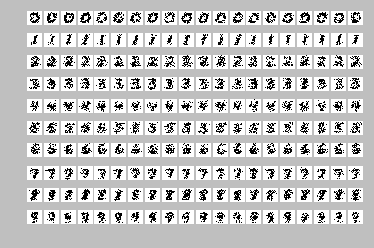

In [174]:
#def P10(num_examples):

### STUDENT START ###
alpha = .0001
clf = BernoulliNB(alpha=alpha)
clf.fit(mini_train_data, mini_train_labels)

new_image = np.zeros(784)

f,axarr = plt.subplots(10,20)

for i in range(len(clf.feature_log_prob_)):
    prob_pixel = np.exp(clf.feature_log_prob_[i])
    for j in range(20):
        rand_pixels = np.random.rand(784)
        for k in range(len(prob_pixel)):
            if rand_pixels[k] >= prob_pixel[k]:
                new_image[k] = 1
            else:
                new_image[k] = 0
        axarr[i,j].imshow((np.reshape(new_image, (28, 28)) * 255).astype(np.uint8))
        axarr[i,j].axis('off')

plt.show()

### STUDENT END ###


#P10(20)

ANSWER: The generated images are vaguely recognizable.  They're not as crisp, but knowing what they are you can recognize the number generated in most cases.  It looks like a pre-weighted Monte Carlo simulation used to create approximations of each number.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [202]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
alpha = .0001
clf = BernoulliNB(alpha=alpha)
clf.fit(mini_train_data, mini_train_labels)

buckets = {"0.5": [], "0.9": [], "0.999": [], "0.99999": [], "0.9999999": [], 
           "0.999999999": [], "0.99999999999": [], "0.9999999999999": [], "1.0": []}

prob_dist = clf.predict_proba(dev_data)

for i in range(len(prob_dist)):
    if max(prob_dist[i]) <= 0.5:
        buckets["0.5"].append(i)
    elif max(prob_dist[i]) <= 0.9:
        buckets["0.9"].append(i)
    elif max(prob_dist[i]) <= 0.999:
        buckets["0.999"].append(i)
    elif max(prob_dist[i]) <= 0.99999:
        buckets["0.99999"].append(i)
    elif max(prob_dist[i]) <= 0.9999999:
        buckets["0.9999999"].append(i)
    elif max(prob_dist[i]) <= 0.999999999:
        buckets["0.999999999"].append(i)
    elif max(prob_dist[i]) <= 0.99999999999:
        buckets["0.99999999999"].append(i)
    elif max(prob_dist[i]) <= 0.9999999999999:
        buckets["0.9999999999999"].append(i)
    else:
        buckets["1.0"].append(i)


for i in list(buckets.keys()):
    if len(buckets[i]) > 0:
        print('Accuracy of ',i,' : %3.2f' %clf.score(dev_data[buckets[i]], dev_labels[buckets[i]]))
    

                
### STUDENT END ###

# buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
# correct = [0 for i in buckets]
# total = [0 for i in buckets]

# P11(buckets, correct, total)

# for i in range(len(buckets)):
#     accuracy = 0.0
#     if (total[i] > 0): accuracy = correct[i] / total[i]
#     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

Accuracy of  0.9  : 0.44
Accuracy of  0.999  : 0.55
Accuracy of  0.99999  : 0.51
Accuracy of  0.9999999  : 0.57
Accuracy of  0.999999999  : 0.70
Accuracy of  0.99999999999  : 0.72
Accuracy of  0.9999999999999  : 0.80
Accuracy of  1.0  : 0.95


ANSWER: This is a weakly calibrated classifer.  There is a directional relationship between predicted accuracy and test accuracy, but the actual accuracy decreases much faster than predicted accuracy.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [281]:
#def P12():

### STUDENT START ###

def trans_in(data_in):
    temp_data = np.zeros(6*28)
    i = 0
    n = 0
    while i<784:
        temp_data[n] = sum(data_in[i+1:i+5])/4
        n += 1
        temp_data[n] = sum(data_in[i+5:i+9])/4
        n += 1
        temp_data[n] = sum(data_in[i+9:i+13])/4
        n += 1
        temp_data[n] = sum(data_in[i+13:i+17])/4
        n += 1
        temp_data[n] = sum(data_in[i+17:i+21])/4
        n += 1
        temp_data[n] = sum(data_in[i+21:i+25])/4
        n += 1
        i += 28
    return temp_data

fil_mini_train_data = np.zeros([1000,(28*6)])
fil_dev_data = np.zeros([1000,(28*6)])

for i in range(len(mini_train_data)):
    temp = trans_in(mini_train_data[i])
    fil_mini_train_data[i] = np.array(temp,copy=True)
        
for i in range(len(dev_data)):
    temp = trans_in(dev_data[i])
    fil_mini_train_data[i] = np.array(temp,copy=True)
    

alpha = 0.001
clf = BernoulliNB(alpha=alpha)
clf.fit(fil_mini_train_data, mini_train_labels)
print('Accuracy: %3.2f' %clf.score(fil_dev_data, dev_labels))
    
### STUDENT END ###

#P12()

Accuracy: 0.09


/Users/vnicholascirella/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
